In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#顯示小數到第二位
pd.set_option('display.float_format', lambda x:'%.2f'% x)

## 資料探索 

In [2]:
#IQR去除異常值資料
sales_data = pd.read_csv('sales_data_IQR.csv')

In [3]:
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])

In [4]:
# 切割測試資料
train_data = sales_data[sales_data['order_date']<="2021-08-31"]
train_data

,Unnamed: 0,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,Revenue
0,0,10eed4a6-5b6b-40d9-84fe-e7152666d2d5,2021-07-09 17:32:43,99d32476-f1eb-4af8-a7d9-28ebd8e1ce12,85,3,7ed47ad3-61a2-423c-937b-c23bf4ad05f3,38177bc5-93b3-4b7a-ad27-d6aa162ccc9a,0ced232a-ba28-4238-8411-264c228aa751,de4598ec-8318-4e21-8e0a-510a49853a07,53867ee1-e97b-44c3-810b-cc0de8f49217,NaN,1.00,255
1,1,b7cf4711-f248-4a12-8bb6-d7a330faac5e,2021-07-06 23:46:09,c54bcaef-b3b9-4601-a5da-8519d33d3b81,89,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,3f6de5e8-3b20-4237-89dc-ee4eff7625a3,08955352-31a8-44ac-8a5e-e13de23db4a2,df5f2a7b-ec52-4505-bd85-26a84438dee0,52eb5d34-a34b-4f29-9d83-e23d48d1e03b,NaN,1.00,89
2,2,0b16dd32-838f-4948-bd95-916d7b1a0a42,2021-02-01 15:06:29,abad439e-5bc0-4097-82e8-e87f0cb057ff,64,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,68e916ca-f999-4e5a-9c34-f277f9bc2867,8c4f97b5-e3c1-4279-9829-ee56f920c12b,2b9626af-4919-45e4-873b-4a07a9749421,dbf9be47-c8e9-4fee-b92d-727f68afab96,NaN,1.00,64
3,3,a4998917-ae04-45e4-a5fe-4dc4a1fa4b35,2021-01-12 20:40:10,fc007164-7f6e-4833-9e36-e141c3fb4fe6,75,1,22f2e7c7-6679-41fd-9c1d-6e9562b51bce,025c6e08-592c-4f3d-8a9e-6d6b685fef33,4b52005f-878a-4b2b-95ee-d9e2d719046a,9c10f54e-63e5-4b8f-b720-4d95639db9bf,8e5145fd-9b3e-448d-b22e-a81991161656,NaN,8.00,75
4,4,a30dca13-d325-4a0c-a8fa-fb2ba762ad93,2021-07-05 00:03:59,f1fc2f7e-2aaa-484d-be31-8369b609cab0,75,2,451ffc74-a780-4ae0-adba-ff8caa8f4b91,025c6e08-592c-4f3d-8a9e-6d6b685fef33,4b52005f-878a-4b2b-95ee-d9e2d719046a,9c10f54e-63e5-4b8f-b720-4d95639db9bf,ba32d21e-9e8c-430b-b8f6-c11e0c34ffb7,NaN,8.00,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12240724,13542096,cb236030-3c07-48b1-96be-b7ecb0d70c92,2021-07-25 19:40:57,937f50f7-c80f-4432-b3b7-a5a57bd2d604,52,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,f2d064b2-a928-48aa-be83-a5b3bfc02f41,db83dcc1-85c9-44f9-a047-426b02e8e1a3,b611c86e-0693-41bb-98d4-6de1b4a837f5,89a1f367-3a48-40e3-a442-d4e8358f0f81,NaN,4.00,52
12240725,13542097,da42381c-bbe2-478b-91ea-3b34c2c759b6,2021-07-15 13:28:30,4a5227ea-0c56-45b0-bb08-92b8f274ca40,84,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,f2d064b2-a928-48aa-be83-a5b3bfc02f41,db83dcc1-85c9-44f9-a047-426b02e8e1a3,b611c86e-0693-41bb-98d4-6de1b4a837f5,62e8b57c-a039-4020-8474-aaf63fcc1fa6,NaN,4.00,84
12240726,13542098,c7a8c271-947c-4dd7-bfbf-2355edde3459,2021-08-13 09:14:52,e0cf9f5e-d6ed-4807-a399-3926c43acfee,55,5,f57143f5-672f-4c78-89f1-242f7a2d8a65,f2d064b2-a928-48aa-be83-a5b3bfc02f41,db83dcc1-85c9-44f9-a047-426b02e8e1a3,b611c86e-0693-41bb-98d4-6de1b4a837f5,718a5e57-cfaa-4e42-9ff4-190b599133c2,NaN,4.00,275
12240727,13542100,1e7a9cd3-965a-43ae-8df1-c702926e1fcd,2021-08-11 21:49:18,a66d93ac-ea1c-46c8-839d-255bea828a2c,99,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,f2d064b2-a928-48aa-be83-a5b3bfc02f41,db83dcc1-85c9-44f9-a047-426b02e8e1a3,b611c86e-0693-41bb-98d4-6de1b4a837f5,66fa5f3d-b645-4757-a818-4ec60ed61b3a,A,4.00,99


In [5]:
# 切割訓練資料
test_data = sales_data[sales_data['order_date']>"2021-08-31"]
test_data

,Unnamed: 0,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,Revenue
13,13,bd859ff5-7b2a-4385-bd5f-a6efd6cb2096,2021-11-05 10:24:10,3827bb0c-38e4-4f43-97b2-874960d1e191,85,1,451ffc74-a780-4ae0-adba-ff8caa8f4b91,48ccd6aa-af11-4ff5-a95a-7dca2aeb45c4,4b52005f-878a-4b2b-95ee-d9e2d719046a,83d61891-a200-4bc8-9b44-5626427191c4,6d096d50-4325-462e-988a-077caf08a60d,NaN,8.00,85
76,78,df7334f8-97ec-48b0-a072-9a91fc0e56c9,2021-09-11 11:36:14,3b17fa9c-3718-4649-ac58-b3a501169f7b,122,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,08fa1fe2-b1d2-4ee6-b303-7f6e4c172a96,9691d10b-150d-4a12-b8c3-db0e15256e63,fe9a0161-5ef7-49f2-963e-342c8abb7e53,28a22b64-0615-4eb4-8c75-bb9ccbaf6ff6,NaN,12.00,122
78,80,bc09190a-ca50-43ff-a574-4168ae3d087a,2021-09-03 13:01:07,28b3e1bf-cc9e-4369-9940-57de4535c23c,79,1,c556530b-d0a9-4beb-bc19-7044962f9aa8,39653f7d-f888-4f53-9cfe-d9143f7e03e0,4b52005f-878a-4b2b-95ee-d9e2d719046a,aa0d1c39-0c33-40c1-81df-4d5517a86814,89fde39c-ab9f-444f-9df3-32388c525787,B,8.00,79
83,85,9ef311dc-c0f9-401a-b1bd-85f02c28bc49,2021-09-04 09:56:43,3dfdb1f8-2900-4d5f-b70c-cab8ad21b6b5,33,1,c556530b-d0a9-4beb-bc19-7044962f9aa8,48ccd6aa-af11-4ff5-a95a-7dca2aeb45c4,4b52005f-878a-4b2b-95ee-d9e2d719046a,83d61891-a200-4bc8-9b44-5626427191c4,6d096d50-4325-462e-988a-077caf08a60d,NaN,8.00,33
89,91,2e64393b-fe17-4e8b-b396-c27f6ff1bd57,2021-09-17 09:39:33,35c0cd0f-83c5-4faa-9508-672e7c69a4d1,159,1,451ffc74-a780-4ae0-adba-ff8caa8f4b91,48ccd6aa-af11-4ff5-a95a-7dca2aeb45c4,4b52005f-878a-4b2b-95ee-d9e2d719046a,83d61891-a200-4bc8-9b44-5626427191c4,6d096d50-4325-462e-988a-077caf08a60d,NaN,8.00,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12240723,13542094,093d3255-aa46-4701-9abc-21696dd9904c,2021-10-20 00:33:13,b6c36a24-fd83-4cb3-a280-d27ddd861384,124,2,f57143f5-672f-4c78-89f1-242f7a2d8a65,f2d064b2-a928-48aa-be83-a5b3bfc02f41,db83dcc1-85c9-44f9-a047-426b02e8e1a3,b611c86e-0693-41bb-98d4-6de1b4a837f5,4bfaecba-b275-4ec6-ad77-e46f8bb5bbb8,NaN,4.00,248
12240728,13542101,85589038-fc43-40dd-8abc-d7d17d4759d0,2021-12-08 16:22:47,fa91ea4d-ee59-459a-b5a5-ae1520b96a91,159,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,f2d064b2-a928-48aa-be83-a5b3bfc02f41,db83dcc1-85c9-44f9-a047-426b02e8e1a3,b611c86e-0693-41bb-98d4-6de1b4a837f5,97e95a50-7753-4453-9baf-f96871c28e8c,A,4.00,159
12240729,13542102,7c92036f-dbef-4ea3-8441-3584511d9301,2021-11-11 22:52:45,96fbac87-ef57-4834-aafb-6aaf9d573f9b,129,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,f2d064b2-a928-48aa-be83-a5b3bfc02f41,db83dcc1-85c9-44f9-a047-426b02e8e1a3,b611c86e-0693-41bb-98d4-6de1b4a837f5,57ad5fcf-7b16-4fdf-8342-c14b44a3baab,NaN,4.00,129
12240731,13542104,5402f22f-0316-4886-8711-bde65e0bf08e,2021-12-07 22:13:58,1510c051-14aa-4442-9b0c-a6b62b65d768,69,2,f57143f5-672f-4c78-89f1-242f7a2d8a65,f2d064b2-a928-48aa-be83-a5b3bfc02f41,db83dcc1-85c9-44f9-a047-426b02e8e1a3,b611c86e-0693-41bb-98d4-6de1b4a837f5,31a92577-21e3-4768-a54c-740bd3af8683,NaN,4.00,138


# IQR去除Outlier分群

In [20]:
def Outlier_treatment(datacolumn):
    Q1,Q3 = np.percentile(datacolumn,[25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    high_range = Q3+(1.5 * IQR)
    return lower_range, high_range

以下以 test_data分群，若想對 train_data分群將 test_data改成 train_data即可

## 取出Recency 

In [6]:
sales_data_user = pd.DataFrame(test_data['customer'].unique())
sales_data_user.columns = ['customer']

In [7]:
#get the max purchase date for each customer
tx_max_purchase = test_data.groupby('customer').order_date.max().reset_index()
tx_max_purchase.columns = ['customer','MaxPurchaseDate']
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days

In [8]:
#on:主鍵
sales_data_user = pd.merge(sales_data_user, tx_max_purchase[['customer', 'Recency']], on='customer')
sales_data_user

,customer,Recency
0,6d096d50-4325-462e-988a-077caf08a60d,9
1,28a22b64-0615-4eb4-8c75-bb9ccbaf6ff6,110
2,89fde39c-ab9f-444f-9df3-32388c525787,2
3,a375421e-e943-4bfb-937c-c309e3c83c93,13
4,55f870d0-86c7-4eaa-87da-8e43cb96dd05,85
...,...,...
68535,a5ba762d-a03a-44b9-8523-a896867083e0,59
68536,f6dcc5ba-8d76-4ef0-8ea9-7c6ffdb91563,40
68537,ce7b08d7-f73b-4674-ad44-e9f788d3132a,22
68538,dfd3bd1a-7098-499b-8744-0dfec1362d75,68


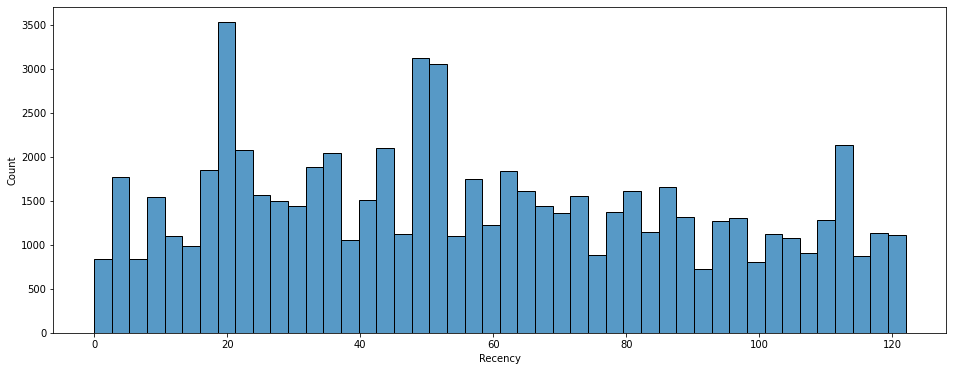

In [9]:
fig,axes = plt.subplots(figsize=(16,6))
sns.histplot(data=sales_data_user['Recency'],ax=axes)
plt.show()

In [10]:
sales_data_user.Recency.describe()

count   68540.00
mean       57.03
std        33.44
min         0.00
25%        29.00
50%        53.00
75%        84.00
max       122.00
Name: Recency, dtype: float64

In [11]:
# function for ordering cluster numbers
# 把cluster做排序
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

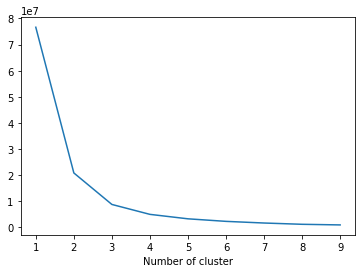

In [12]:
from sklearn.cluster import KMeans

sse={}
tx_recency = sales_data_user[['Recency']]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(sales_data_user[['Recency']])
sales_data_user['RecencyCluster'] = kmeans.predict(sales_data_user[['Recency']])
#false降冪
sales_data_user = order_cluster('RecencyCluster','Recency', sales_data_user, False)

sales_data_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,19944.00,99.86,12.97,79.00,88.00,100.00,112.00,122.00
1,25101.00,57.14,10.79,39.00,50.00,56.00,66.00,78.00
2,23495.00,20.56,10.37,0.00,13.00,20.00,30.00,38.00


##  取出 Frequency 

In [14]:
#get order counts for each user and create a dataframe with it
tx_frequency = test_data.groupby('customer').order_date.count().reset_index()
tx_frequency.columns = ['customer','Frequency']

#add this data to our main dataframe
sales_data_user = pd.merge(sales_data_user, tx_frequency, on='customer')
sales_data_user

,customer,Recency,RecencyCluster,Frequency
0,6d096d50-4325-462e-988a-077caf08a60d,9,2,194
1,89fde39c-ab9f-444f-9df3-32388c525787,2,2,151
2,a375421e-e943-4bfb-937c-c309e3c83c93,13,2,88
3,471013b7-7d2d-4657-b989-247dacc94fa3,2,2,131
4,dd329025-ab2f-4701-b1f2-ffc9c0e3e77f,18,2,154
...,...,...,...,...
68535,77b05c33-e95e-447d-ac13-9da7cedb1878,68,1,1
68536,a5ba762d-a03a-44b9-8523-a896867083e0,59,1,1
68537,f6dcc5ba-8d76-4ef0-8ea9-7c6ffdb91563,40,1,1
68538,dfd3bd1a-7098-499b-8744-0dfec1362d75,68,1,1


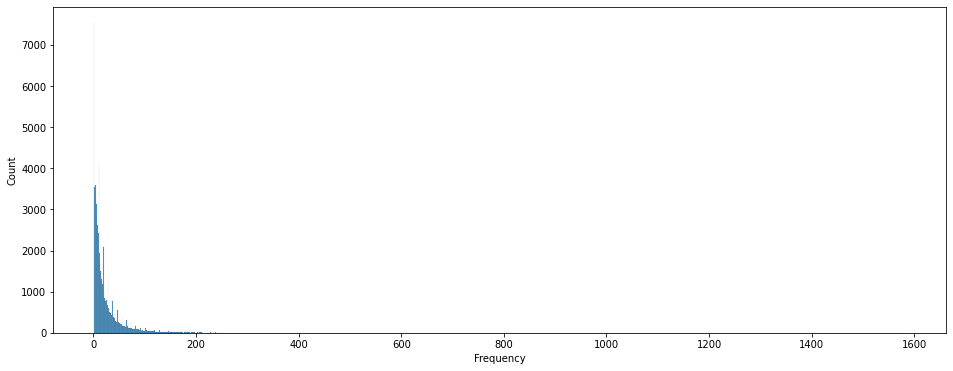

In [15]:
fig, axes = plt.subplots(figsize=(16,6))
sns.histplot(data=sales_data_user['Frequency'], ax=axes)
plt.show()

In [16]:
tx_frequency.Frequency.describe()

count   68540.00
mean       24.04
std        36.07
min         1.00
25%         5.00
50%        12.00
75%        28.00
max      1583.00
Name: Frequency, dtype: float64

In [17]:
#k-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(sales_data_user[['Frequency']])
sales_data_user['FrequencyCluster'] = kmeans.predict(sales_data_user[['Frequency']])
#false降冪
sales_data_user = order_cluster('FrequencyCluster','Frequency', sales_data_user, True)

#see details of each cluster
sales_data_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,57730.00,12.59,10.23,1.00,4.00,9.00,18.00,41.00
1,9599.00,69.93,24.24,42.00,50.00,63.00,84.00,138.00
2,1211.00,206.19,88.84,139.00,155.00,180.00,225.00,1583.00


In [21]:
lowerbound, highbound = Outlier_treatment(sales_data_user['Frequency'])
sales_data_user[(sales_data_user['Frequency']<lowerbound) | (sales_data_user['Frequency']>highbound)]

,customer,Recency,RecencyCluster,Frequency,FrequencyCluster
0,6d096d50-4325-462e-988a-077caf08a60d,9,2,194,2
1,89fde39c-ab9f-444f-9df3-32388c525787,2,2,151,2
2,dd329025-ab2f-4701-b1f2-ffc9c0e3e77f,18,2,154,2
3,232c6eba-a3b2-4ddd-b1e7-94528005e159,4,2,210,2
4,6ade6377-557e-4906-9836-223545c99dc5,14,2,402,2
...,...,...,...,...,...
10767,e9e62d6b-faf0-4307-95bc-3469df8314ac,75,1,110,1
10769,34f3d4ac-4e3f-41a5-b4cc-c4b4cc1770db,41,1,86,1
10780,1a983dce-d46e-4517-8f59-14a8201868c0,67,1,70,1
10790,d10e8a52-3e8e-4b3b-a222-0b525a5fe963,50,1,67,1


In [22]:
sales_data_user.drop(sales_data_user[(sales_data_user['Frequency']<lowerbound) | (sales_data_user['Frequency']>highbound)].index, inplace=True)

In [23]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(sales_data_user[['Frequency']])
sales_data_user['FrequencyCluster'] = kmeans.predict(sales_data_user[['Frequency']])
#false降冪
sales_data_user = order_cluster('FrequencyCluster','Frequency', sales_data_user, True)

#see details of each cluster
sales_data_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,38257.00,6.37,3.85,1.00,3.00,6.00,9.00,14.00
1,16698.00,22.64,5.63,15.00,18.00,22.00,27.00,34.00
2,7539.00,45.99,7.90,35.00,39.00,45.00,52.00,62.00


##  取出Monetary 

In [24]:
tx_revenue = test_data.groupby('customer').Revenue.sum().reset_index()

#add this data to our main dataframe
sales_data_user = pd.merge(sales_data_user, tx_revenue, on='customer')
sales_data_user.head()

,customer,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,d8875a0d-c5b8-48de-bf18-c73905da283d,14,2,42,2,5728
1,7712535d-7266-41d2-bfd2-463e40ddf1bb,16,2,51,2,6719
2,cea6ad6b-298e-42de-98c3-437e7ca0dfbf,18,2,58,2,6956
3,ff20d361-e0ea-4f8d-b9f0-4ee0cc47633c,20,2,42,2,4504
4,56a186d6-e1b8-4fc7-be60-53c881a678b4,19,2,50,2,3429


In [25]:
sales_data_user.Revenue.describe()

count   62494.00
mean     1844.95
std      1662.28
min         0.00
25%       637.00
50%      1315.00
75%      2570.00
max     16808.00
Name: Revenue, dtype: float64

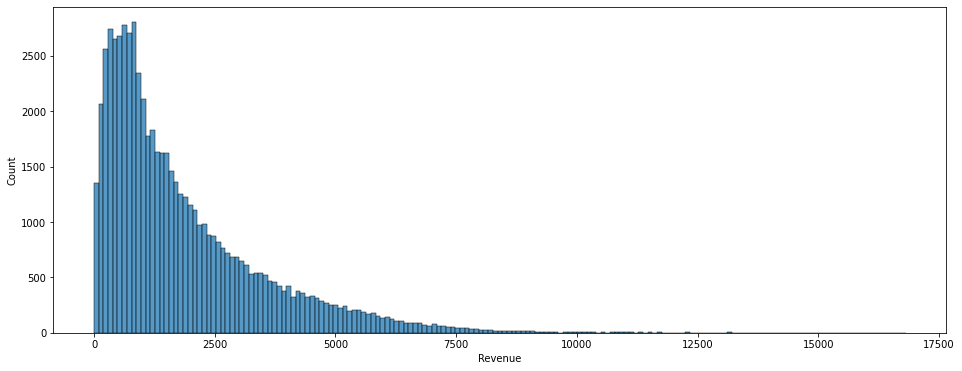

In [26]:
fig, axes = plt.subplots(figsize=(16,6))
sns.histplot(data=sales_data_user['Revenue'], ax=axes)
plt.show()

In [27]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(sales_data_user[['Revenue']])
sales_data_user['RevenueCluster'] = kmeans.predict(sales_data_user[['Revenue']])
#false降冪
sales_data_user = order_cluster('RevenueCluster','Revenue', sales_data_user, True)

#see details of each cluster
sales_data_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,37901.00,798.50,460.43,0.00,417.00,757.00,1159.00,1736.00
1,17887.00,2677.16,661.30,1737.00,2098.00,2567.00,3185.00,4105.00
2,6706.00,5539.54,1303.58,4106.00,4584.00,5196.50,6105.75,16808.00


## Customer lifetime value 

In [213]:
sales_data_user['OverallScore'] = sales_data_user['RecencyCluster'] + sales_data_user['FrequencyCluster']+ sales_data_user['RevenueCluster']

print(sales_data_user.groupby('OverallScore')['Recency'].mean())
print(sales_data_user.groupby('OverallScore')['Frequency'].mean())
print(sales_data_user.groupby('OverallScore')['Revenue'].mean())

OverallScore
0   100.80
1    62.81
2    42.43
3    50.70
4    31.32
5    36.69
6    20.90
Name: Recency, dtype: float64
OverallScore
0    6.89
1    8.96
2   13.81
3   27.46
4   33.88
5   52.04
6   61.27
Name: Frequency, dtype: float64
OverallScore
0    860.93
1   1121.00
2   1688.23
3   3211.75
4   3905.12
5   5982.33
6   7427.93
Name: Revenue, dtype: float64


In [214]:
sales_data_user['OverallScore'].value_counts()

0    16134
1    14490
2    11103
3     7587
4     6848
6     3719
5     3397
Name: OverallScore, dtype: int64

劃分低/中/高價值客戶

In [215]:
#0 1 
sales_data_user['Segment'] = 'Low-Value'
#2 3 4 
sales_data_user.loc[sales_data_user['OverallScore']>1,'Segment'] = 'Mid-Value'
# 5 6
sales_data_user.loc[sales_data_user['OverallScore']>4,'Segment'] = 'High-Value'
sales_data_user

,customer,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,7712535d-7266-41d2-bfd2-463e40ddf1bb,16,2,63,2,8524,2,6,High-Value
1,cea6ad6b-298e-42de-98c3-437e7ca0dfbf,18,2,71,2,8243,2,6,High-Value
2,ff20d361-e0ea-4f8d-b9f0-4ee0cc47633c,20,2,53,2,5950,2,6,High-Value
3,c8500e9e-13ec-4d22-bf0b-ab2c0d7a8c31,29,2,70,2,7744,2,6,High-Value
4,7eb8ffeb-ca4a-45b8-a9f5-83a2e41af28e,20,2,66,2,6680,2,6,High-Value
...,...,...,...,...,...,...,...,...,...
63273,0503fda6-385d-4004-b863-eea45740eb45,50,1,20,1,1861,0,2,Mid-Value
63274,3854fbe2-d352-47f1-96a5-82d5be2b1383,57,1,20,1,1827,0,2,Mid-Value
63275,690ac964-c7f6-452c-8933-673b59d76880,65,1,19,1,1789,0,2,Mid-Value
63276,81c2beda-77ab-4bd6-afd6-dc110c08d217,61,1,21,1,2182,0,2,Mid-Value


In [216]:
sales_data_user['Segment'].value_counts()

Low-Value     30624
Mid-Value     25538
High-Value     7116
Name: Segment, dtype: int64

In [179]:
#訓練分群資料儲存
sales_data_user.to_csv("person_cluster_new.csv")

In [218]:
#測試分群資料儲存
sales_data_user.to_csv("test_RFM.csv")